
# ML-Unsupervised-K_Means-Clustering

## Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing DataSet

In [4]:
df=pd.read_csv('/Users/gottumukkalasaimanojvarma/Desktop/ML-Unsupervised Learning/penguins.csv')

## Exploratory Data Analysis

In [5]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.shape

(344, 5)

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [10]:
#Handling Missing Values

df.dropna(inplace=True)

df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

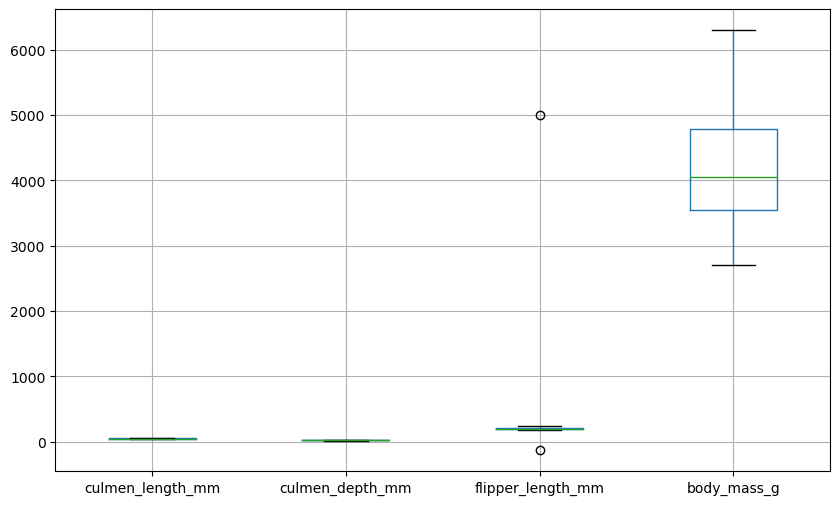

In [11]:
#Checking for Outliers

plt.figure(figsize=(10, 6))
df.boxplot()
plt.show()

In [12]:
sum(df['flipper_length_mm']>400)

1

In [13]:
#Filter out outliers
df = df[(df['flipper_length_mm'].between(0, 4000))]


In [14]:
#Filter out rows with incorrect or placeholder values in the 'sex' column
df = df.loc[df['sex'].isin(['MALE', 'FEMALE'])]

#Reset index
df.reset_index(drop=True, inplace=True)

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [16]:
#Checking for any duplicates in the columns.
df.duplicated().sum()

0

## Encoding Categorical Data

In [17]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
df_scaled=Scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,0.993994
330,0.216543,-1.202160,0.786603,1.233968,-1.006042


## Principal Component Analysis (PCA)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_df = pca.fit(df_scaled)

pca_df.explained_variance_ratio_

array([0.56820593, 0.28153159, 0.09633697, 0.03399271, 0.01993278])

In [20]:
#We can see first two are most prominent hence setting componets to 2

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

In [21]:
print(pca_df)

[[-1.56968445  1.19590356]
 [-1.53725324 -0.7132486 ]
 [-1.58761602 -0.57856752]
 [-2.05554862 -0.23691914]
 [-1.58065301  1.76897195]
 [-1.9772828  -0.57332238]
 [-0.51335932  1.45036734]
 [-2.0091688  -0.59782384]
 [-1.59792868  1.94751451]
 [-1.9601425  -0.67222962]
 [-1.75464204 -0.28605697]
 [-0.45902298  1.90209414]
 [-2.54675203 -0.55602766]
 [-0.62412396  2.2885362 ]
 [-2.59149618 -0.40488406]
 [-1.83207283  1.14947785]
 [-2.02636195 -0.25002503]
 [-1.24623907  0.94865219]
 [-1.34759131  0.69461718]
 [-2.10704771 -0.35578405]
 [-1.48275026  1.1868289 ]
 [-1.90978331 -0.55210897]
 [-2.88624161 -0.30051165]
 [-1.38704209  1.32576447]
 [-2.119407   -0.91996638]
 [-1.64699729  0.9624712 ]
 [-1.86874493 -0.61981671]
 [-1.22670503  1.30817025]
 [-1.69825857 -1.03564788]
 [-1.08804833  1.91699053]
 [-1.31517586  1.56797017]
 [-1.90712522 -0.22899861]
 [-2.56483236 -0.131523  ]
 [-0.83738835  1.37850838]
 [-2.50178568 -0.61650422]
 [-0.7085428   1.06089532]
 [-2.50232093 -0.49633963]
 

## K-Means Clustering

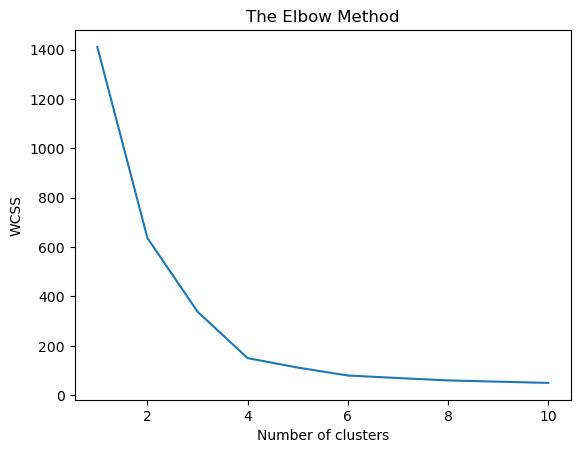

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

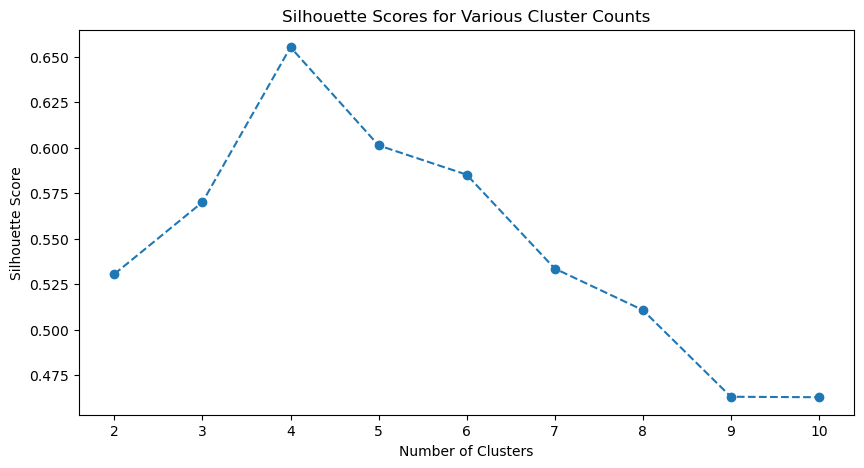

In [23]:
#Calculating Silhouette_scores
from sklearn.metrics import silhouette_score
silhouette_scores = []

for i in range(2, 11):  # Avoid single cluster (invalid for Silhouette)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(pca_df)
    score = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [24]:
#Based on the Elbow Method choosing k=4

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_df)

In [25]:
y_kmeans

array([0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,

## Visualising of Clusters


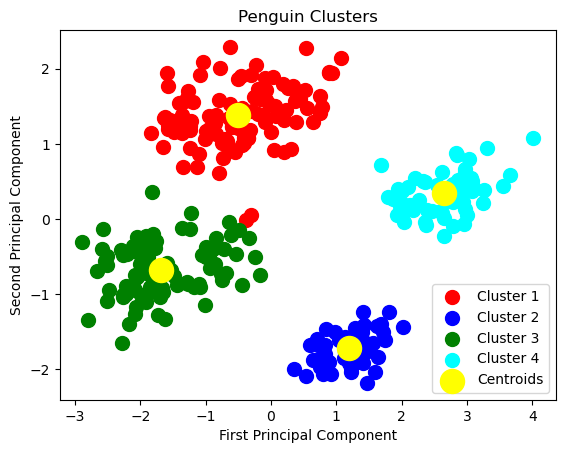

In [26]:
plt.scatter(pca_df[y_kmeans == 0, 0], pca_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_df[y_kmeans == 1, 0], pca_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_df[y_kmeans == 2, 0], pca_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_df[y_kmeans == 3, 0], pca_df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Penguin Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [27]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,False
328,46.8,14.3,215.0,4850.0,False
329,50.4,15.7,222.0,5750.0,True
330,45.2,14.8,212.0,5200.0,False


In [28]:
df['cluster']=y_kmeans

In [29]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,39.1,18.7,181.0,3750.0,True,0
1,39.5,17.4,186.0,3800.0,False,2
2,40.3,18.0,195.0,3250.0,False,2
3,36.7,19.3,193.0,3450.0,False,2
4,39.3,20.6,190.0,3650.0,True,0
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,False,1
328,46.8,14.3,215.0,4850.0,False,1
329,50.4,15.7,222.0,5750.0,True,3
330,45.2,14.8,212.0,5200.0,False,1


In [30]:
df.to_excel('/Users/gottumukkalasaimanojvarma/Desktop/ML-Unsupervised Learning/penguins_op_clusters.xlsx', index=False)
